In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('./quikr_car.csv')
df.head()

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000",Diesel


In [4]:
df.dtypes

Name of car     object
Company name    object
Year            object
Price           object
Kms driven      object
Fuel_type       object
dtype: object

### Initial data cleaning and processing

##### Getting rid of bad data and outliers

In [5]:
bad=['i','2012','well','all','7','9','scratch','urgent','sell','any','very','sale','used','selling','URJENT','Commercial','Used','Sale','Any','Well','I'] 
for i in df['Company name']:
    if i in bad:
        df = df.drop(df[df['Company name'] ==i].index)

In [6]:
bad_years= ['/-Rs','2 bs','150k','EV2','Eon','Sale','TOUR','ara)','cab','car','cent','d...','digo','e...','emi','o...','odel','r 15','sale','t xe','zest','tion','SALE','2bs']
for i in df['Year']:
    if i in bad_years:
        df=df.drop(df[df['Year']==i].index)

In [7]:
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].str.replace('Ask For Price','0')
df['Price']=pd.to_numeric(df['Price'])

In [8]:
df['Kms driven']=df['Kms driven'].str.replace(',','')
df['Kms driven']=df['Kms driven'].str.replace('kms','')
df['Kms driven']=df['Kms driven'].str.replace('Petrol','0')
df['Kms driven']=pd.to_numeric(df['Kms driven'])

In [9]:
df['Company name']=df['Company name'].str.replace('tata','Tata')
df['Company name']=df['Company name'].str.replace('TATA','Tata')
df['Company name']=df['Company name'].str.replace('Tara','Tata')
df['Company name']=df['Company name'].str.replace('MARUTI','Maruti')
df['Company name']=df['Company name'].str.replace('Swift','Maruti')

In [10]:
for i in df['Price']:
    if i==0:
        df=df.drop(df[df['Price']==i].index)

#### Removing outliers

In [11]:
df=df.drop(df[df['Name of car']=='Mahindra XUV500 W6'].index)

In [46]:
df=df.dropna()

## Exploratory Data Analysis

In [47]:
companyList=df.groupby('Company name')['Name of car'].count()

In [48]:
companyList.keys()

Index(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land', 'Mahindra',
       'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object', name='Company name')

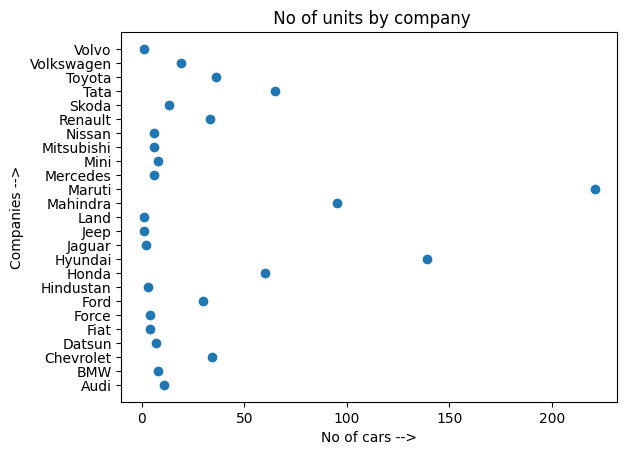

In [51]:
plt.scatter(companyList.values,companyList.keys())
plt.xlabel('No of cars -->')
plt.ylabel('Companies -->')
plt.title(' No of units by company')
plt.show()

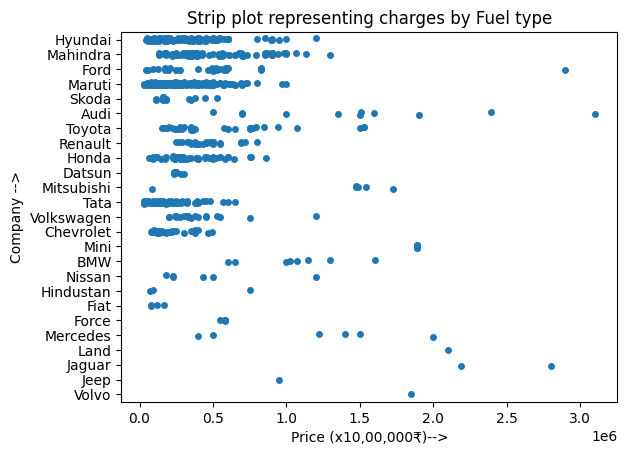

In [52]:
x=np.array(df['Price'])
y=np.array(df['Company name'])
data={'Price':x,'Company name':y}
plot_data=pd.DataFrame(data)
sns.stripplot(x='Price',y='Company name',data=plot_data,jitter=True)
plt.xlabel('Price (x10,00,000₹)-->')
plt.ylabel('Company -->')
plt.title('Strip plot representing charges by Fuel type')
plt.show()

### Market share

In [53]:
explode=[]
for i in range(0,len(companyList)):
    explode.append(0.35)

Market share by companies (no of units listed)


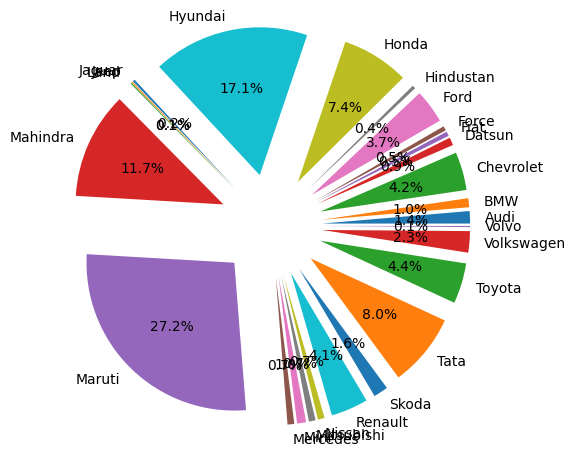

In [60]:
plt.pie(companyList.values,labels=companyList.keys(),explode=explode,autopct='%1.1f%%')
print('Market share by companies (no of units listed)')
plt.show()

In [55]:
price_explode = [i * 2 for i in explode]

Market share by companies (total revenue)


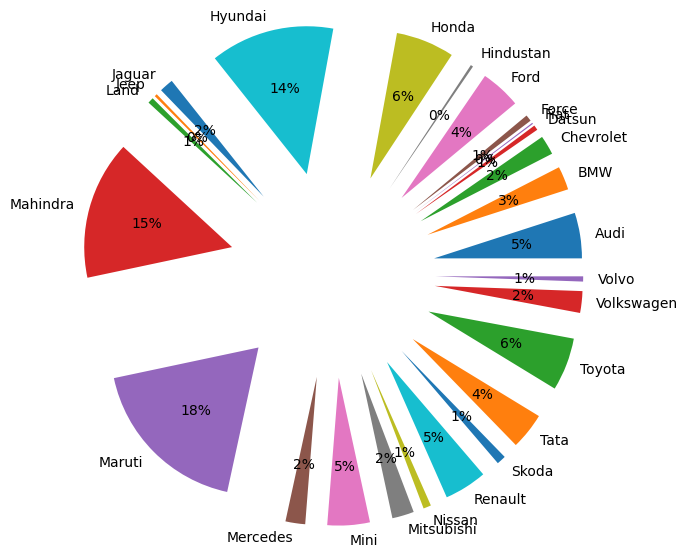

In [58]:
grouped = df.groupby('Company name')['Price'].sum()
plt.pie(grouped.values,labels=grouped.keys(),explode=price_explode,autopct='%1.0f%%')
print('Market share by companies (total revenue)')
plt.show()

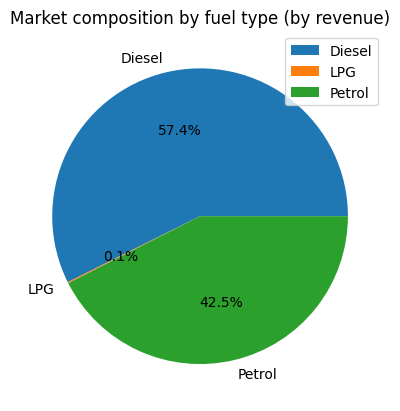

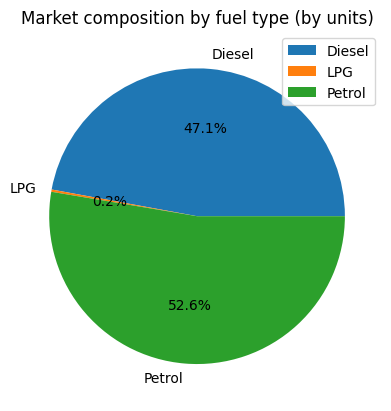

In [78]:
plt.figure(0)
fuel_type_share=df.groupby('Fuel_type')['Price'].sum()
plt.pie(fuel_type_share.values,labels=fuel_type_share.keys(),autopct='%1.1f%%')
plt.title('Market composition by fuel type (by revenue)')
plt.legend()
plt.figure(1)
fuelType= df.groupby('Fuel_type')['Year'].count()
plt.pie(fuelType.values,labels=fuelType.keys(),autopct='%1.1f%%')
plt.title('Market composition by fuel type (by units)')
plt.legend()
plt.show()
plt.show()

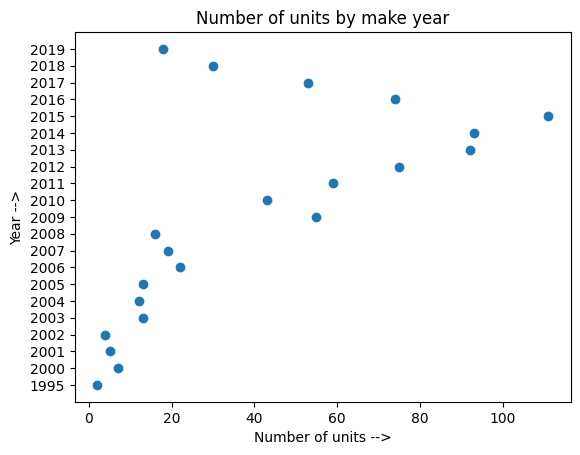

Most common make year:  2015   | Number of units:  111
Least common make year:  1995  | Number of units:  2


In [43]:
years=df.groupby('Year')['Company name'].count()
plt.scatter(years.values,years.keys())
plt.title('Number of units by make year')
plt.xlabel('Number of units -->')
plt.ylabel('Year -->')
plt.show()
for i in df['Year']:
    if years[i]==max(years):
        print('Most common make year: ',i,'  | Number of units: ',years[i])
        break
for i in df['Year']:    
    if years[i]==min(years):
        print('Least common make year: ',i,' | Number of units: ',years[i])
        break
        

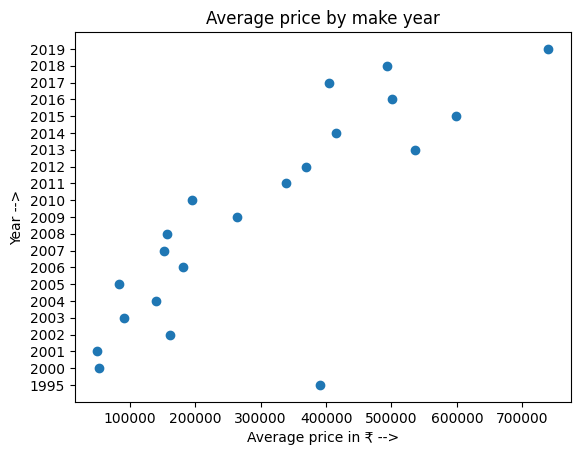

In [41]:
years_average=df.groupby('Year')['Price'].mean()
plt.scatter(years_average.values,years_average.keys())
plt.title('Average price by make year')
plt.xlabel('Average price in ₹ -->')
plt.ylabel('Year -->')
plt.show()

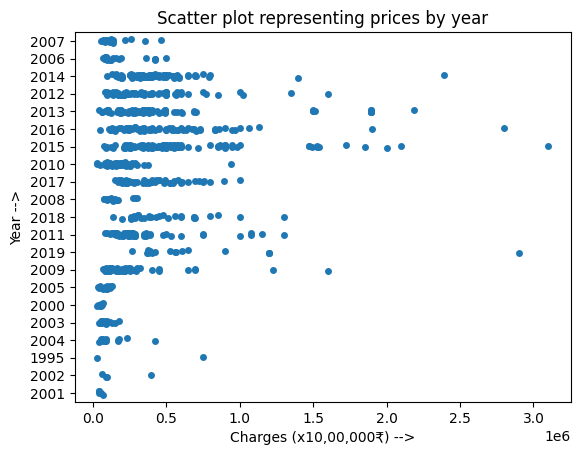

In [80]:
x=np.array(df['Price'])
y=np.array(df['Year'])
data={'Price':x,'Year':y}
plot_data=pd.DataFrame(data)
sns.stripplot(x='Price',y='Year',data=plot_data,jitter=True)
plt.xlabel('Charges (x10,00,000₹) -->')
plt.ylabel('Year -->')
plt.title('Scatter plot representing prices by year')
plt.show()

In [20]:
mean_scatter_data=df.groupby('Company name')['Price'].mean()
median_scatter_data=df.groupby('Company name')['Price'].median()

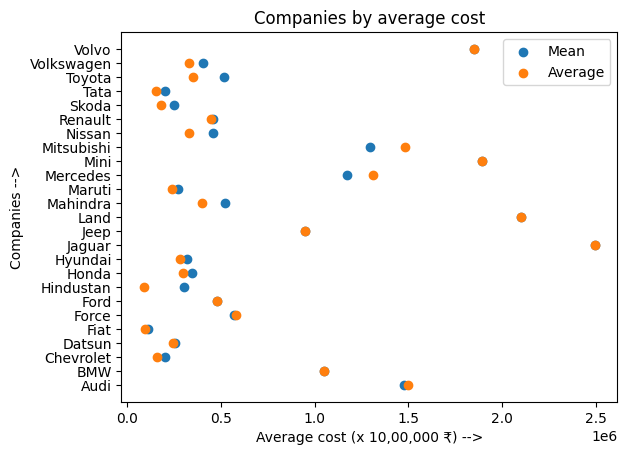

In [26]:
plt.scatter(mean_scatter_data.values,mean_scatter_data.keys(),label='Mean')
plt.scatter(median_scatter_data,median_scatter_data.keys(),label='Average')
plt.title('Companies by average cost')
plt.xlabel('Average cost (x 10,00,000 ₹) -->')
plt.ylabel('Companies -->')
plt.legend()
plt.show()

In [67]:
for i in mean_scatter_data.keys():
    if mean_scatter_data[i]==max(mean_scatter_data):
        print('Most expensive car brand: ', i,'| Average price: ₹{:,.2f}'.format(mean_scatter_data[i]))
    if mean_scatter_data[i]==min(mean_scatter_data):
        print('Least expensive car brand: ',i,' | Average price: ₹{:,.2f}'.format(mean_scatter_data[i]))

Least expensive car brand:  Fiat  | Average price: ₹109,875.00
Most expensive car brand:  Jaguar | Average price: ₹2,495,000.00


In [68]:
print('Most expensive car')
df[df['Price']==max(df['Price'])]

Most expensive car


,Name of car,Company name,Year,Price,Kms driven,Fuel_type
719,Audi A3 Cabriolet 40 TFSI,Audi,2015,3100000,12516,Petrol


In [69]:
print('Least expensive cars')
df[df['Price']==min(df['Price'])]

Least expensive cars


,Name of car,Company name,Year,Price,Kms driven,Fuel_type
389,Maruti Suzuki Maruti 800 Std – Befo,Maruti,1995,30000,55000,Petrol
851,Maruti Suzuki 800 Std BS III,Maruti,2000,30000,33400,Petrol


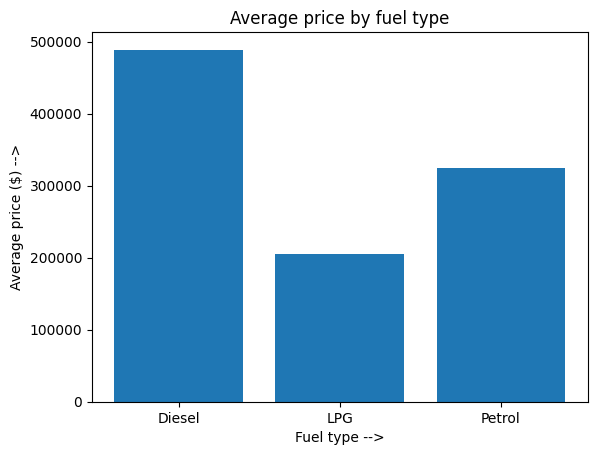

In [81]:
petrol=df.groupby('Fuel_type')['Price'].mean()
color=sns.color_palette('dark')
plt.bar(petrol.keys(),petrol.values)
plt.xlabel('Fuel type -->')
plt.ylabel('Average price ($) -->')
plt.title('Average price by fuel type')
plt.show()

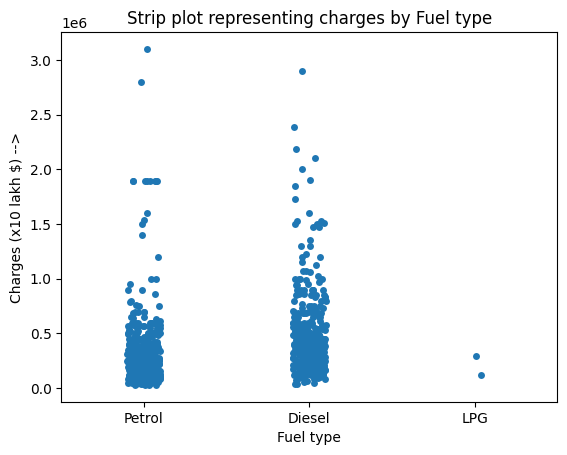

In [45]:
x=np.array(df['Fuel_type'])
y=np.array(df['Price'])
data={'Fuel_type':x,'Price':y}
plot_data=pd.DataFrame(data)
sns.stripplot(x='Fuel_type',y='Price',data=plot_data,jitter=True)
plt.xlabel('Fuel type')
plt.ylabel('Charges (x10 lakh $) -->')
plt.title('Strip plot representing charges by Fuel type')
plt.show()